In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()



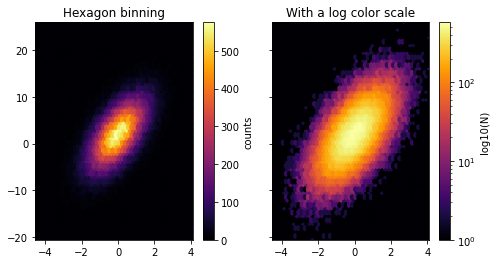

In [2]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()


C:\Users\alber\AppData\Local\Temp/ipykernel_30492/3049263539.py:32: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)


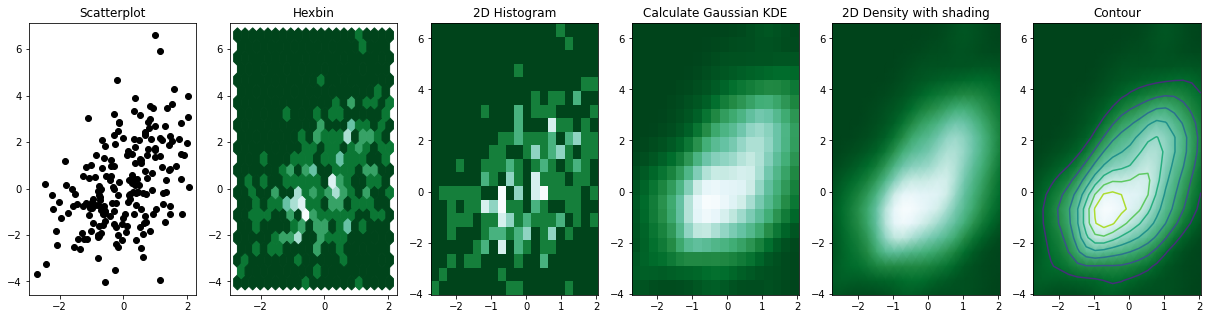

In [85]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
 
# Create data: 200 points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T
 
# Create a figure with 6 plot areas
fig, axes = plt.subplots(ncols=6, nrows=1, figsize=(21, 5))
 
# Everything starts with a Scatterplot
axes[0].set_title('Scatterplot')
axes[0].plot(x, y, 'ko')
# Thus we can cut the plotting window in several hexbins
nbins = 20
axes[1].set_title('Hexbin')
axes[1].hexbin(x, y, gridsize=nbins, cmap=plt.cm.BuGn_r)
 
# 2D Histogram
axes[2].set_title('2D Histogram')
axes[2].hist2d(x, y, bins=nbins, cmap=plt.cm.BuGn_r)
 
# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# plot a density
axes[3].set_title('Calculate Gaussian KDE')
axes[3].pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.BuGn_r)
 
# add shading
axes[4].set_title('2D Density with shading')
axes[4].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
 
# contour
axes[5].set_title('Contour')
axes[5].pcolormesh(xi, yi, zi.reshape(xi.shape), shading='gouraud', cmap=plt.cm.BuGn_r)
axes[5].contour(xi, yi, zi.reshape(xi.shape) )

In [10]:
import pandas as pd
df = pd.read_csv('heatmap.csv')

In [16]:
ind = df.index 

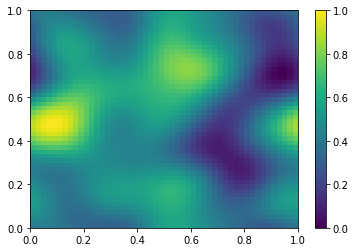

In [65]:
from scipy.ndimage.filters import gaussian_filter

# Generate data for the plot
x = np.linspace(0, 1, 51)
y = np.linspace(0, 1, 51)
r = np.random.RandomState(42)
z = gaussian_filter(r.random_sample([50, 50]), sigma=5, mode='wrap')
z -= np.min(z)
z /= np.max(z)

# Generate the plot
fig, ax = plt.subplots()
cmap = ax.pcolormesh(x, y, z)
fig.colorbar(cmap)
plt.show(fig)

# heatmap 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate
import numpy as np
import matplotlib.colors as colors


In [115]:
# import data

x = df['Elevation Zone']
y = df['Year']
z = df['Value ']

In [116]:
# Set up a regular grid of interpolation points
spacing = 500
xi, yi = np.linspace(x.min(), x.max(), spacing), np.linspace(y.min(), 
                     y.max(), spacing)

XI, YI = np.meshgrid(xi, yi)

In [117]:
# Interpolate
rbf = scipy.interpolate.Rbf(x, y, z, function='linear')

ZI = rbf(XI, YI)

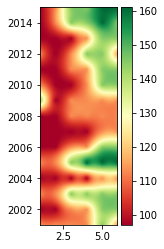

In [118]:
#plot

fig, ax = plt.subplots()

sc = ax.imshow(ZI, vmin=z.min(), vmax=z.max(), origin='lower',
            extent=[x.min(), x.max(), y.min(), 
                    y.max()], cmap="RdYlGn")

fig.colorbar(sc, ax=ax, fraction=0.05, pad=0.01)

plt.show()

In [125]:
color_map = plt.cm.get_cmap('RdYlGn')
reversed_color_map = color_map.reversed()

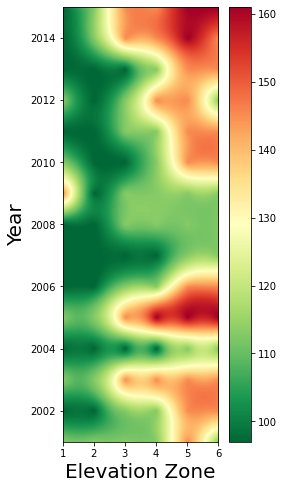

In [131]:
plt.figure(figsize= (4,8))

plt.imshow(ZI, vmin=z.min(), vmax=z.max(), origin='lower',
            extent=[x.min(), x.max(), y.min(), 
                    y.max()], cmap=reversed_color_map)

plt.colorbar()
plt.xlabel('Elevation Zone',fontsize = 20)
plt.ylabel('Year', fontsize = 20)
plt.show()